## Dataset Overview

## Introduction ## 
**This project aims to analyze the thermal efficiency of a slurry cooler in an HDPE plant. The dataset contains various operational parameters that are believed to influence the thermal efficiency of the slurry cooler. By understanding these relationships, we hope to provide actionable insights for optimizing the performance of the slurry cooler**.

## Dataset Description
_The dataset includes the following columns_:

1. **Inlet_Temp_C** : The temperature of the slurry entering the cooler.
2. **Outlet_Temp_C** : The temperature of the slurry exiting the cooler.
3. **Thermal Efficiency**: A measure of the cooler's efficiency in transferring heat from the slurry.**This is the target variable we aim to optimize.**
4. **Flow_Rate(L/min)** : The rate at which the slurry flows through the cooler, typically measured in liters per second or cubic meters per hour.
5. **Concentration** : The concentration of the slurry.
6. **Pressure_Drop_kPa** : The difference in pressure between the inlet and outlet of the cooler.
7. **Energy_Consumption_kWh** : The amount of energy consumed by the cooler.

## Objective
**The primary goal is to identify key factors that influence the thermal efficiency of the slurry cooler. By analyzing the dataset, we aim to**:
- **Understand the relationship between primary operational parameters (input temperature, output temperature, flow rate, concentration, and pressure drop) and thermal efficiency**.
- **Investigate the role of energy consumption in thermal efficiency**.
- **Provide actionable insights for optimizing the performance of the slurry cooler, leading to better energy consumption and operational cost management**.

## Data Source
**The data was collected from GAIL,HDPE plant during our summer internship phase(16 may to 16 june),data was collected from an HDPE plant during regular operations. Data was recorded each day at 3-hour intervals ,providing a comprehensive view of the cooler's performance under various conditions**.

## Data Preprocessing
**Before analysis, the dataset will undergo preprocessing steps to handle missing values, outliers. This ensures the accuracy and reliability of the analysis**.

## Exploratory Data Analysis (EDA)
**Initial exploratory data analysis will be conducted to visualize the data distribution and understand the relationships between different parameters. This includes descriptive statistics, correlation analysis, and scatter plots**.

## Statistical Analysis
**Hypothesis testing was conducted to assess specific relationships and differences within the dataset**.**In particular, we used the t-test to evaluate whether there were significant differences between groups**.

## Insights and Recommendations
**Optimize Energy Use: Balance increased energy consumption with cost-effectiveness to enhance efficiency while managing costs**.

**Consider Cost vs. Benefit: Weigh the benefits of improved efficiency against the higher costs and potential plant impact of increased energy consumption**.

## Conclusion
**This project will provide a comprehensive analysis of the factors influencing the thermal efficiency of a slurry cooler in an HDPE plant. The insights gained will help in making informed decisions to enhance the cooler's performance and operational efficiency**.


# DATA PREPROCESSING

In [38]:
#perform linear operation
import numpy as np
#Data manipulation
import pandas as pd
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

In [24]:
#Load the data
df = pd.read_csv(r"K:\THERMAL_EFFICIENCY.csv") # importing csv file


In [25]:
df.head()

,Date,Time,Inlet_Temp_C,Outlet_Temp_C,Specific_heat_capacity,Flow_Rate(L/min),Thermal_Efficiency,Pressure_Drop_kPa,Concentration_PPM,Energy_Consumption_kWh
0,20-05-2024,00:00:00,77.48,50.13,4.18,251.29,85.43,23.65,450.13,29.89
1,20-05-2024,15:00:00,84.15,52.48,4.18,385.24,82.17,38.74,982.36,18.98
2,20-05-2024,18:00:00,79.41,35.29,4.18,437.98,71.58,19.85,201.78,19.73
3,20-05-2024,21:00:00,96.73,54.68,4.18,278.49,74.28,48.23,635.47,21.34
4,21-05-2024,00:00:00,87.92,59.22,4.18,456.32,93.24,12.41,46.89,22.19


In [26]:
df.shape

(68, 10)

In [ ]:
**"In above dataset there are 68 rows and 10 columns"**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    68 non-null     object 
 1   Time                    68 non-null     object 
 2   Inlet_Temp_C            68 non-null     float64
 3   Outlet_Temp_C           68 non-null     float64
 4   Specific_heat_capacity  68 non-null     float64
 5   Flow_Rate(L/min)        66 non-null     float64
 6   Thermal_Efficiency      67 non-null     float64
 7   Pressure_Drop_kPa       67 non-null     float64
 8   Concentration_PPM       67 non-null     float64
 9   Energy_Consumption_kWh  67 non-null     float64
dtypes: float64(8), object(2)
memory usage: 5.4+ KB


In [7]:
#check the null values
df.isnull().sum()

Date                      0
Time                      0
Inlet_Temp_C              0
Outlet_Temp_C             0
Specific_heat_capacity    0
Flow_Rate(L/min)          2
Thermal_Efficiency        1
Pressure_Drop_kPa         1
Concentration_PPM         1
Energy_Consumption_kWh    1
dtype: int64

In [8]:
df.dtypes

Date                       object
Time                       object
Inlet_Temp_C              float64
Outlet_Temp_C             float64
Specific_heat_capacity    float64
Flow_Rate(L/min)          float64
Thermal_Efficiency        float64
Pressure_Drop_kPa         float64
Concentration_PPM         float64
Energy_Consumption_kWh    float64
dtype: object

In [28]:
#Handle missing values
df["Flow_Rate(L/min)"]=df["Flow_Rate(L/min)"].fillna(df["Flow_Rate(L/min)"].mean())
df["Thermal_Efficiency"]=df["Thermal_Efficiency"].fillna(df["Thermal_Efficiency"].mean())
df["Pressure_Drop_kPa"]= df["Pressure_Drop_kPa"].fillna(df["Pressure_Drop_kPa"].mean())
df["Energy_Consumption_kWh"]=df["Energy_Consumption_kWh"].fillna(df["Energy_Consumption_kWh"].mean())
df["Concentration_PPM"]=df["Concentration_PPM"].fillna(df["Concentration_PPM"].median())
df

,Date,Time,Inlet_Temp_C,Outlet_Temp_C,Specific_heat_capacity,Flow_Rate(L/min),Thermal_Efficiency,Pressure_Drop_kPa,Concentration_PPM,Energy_Consumption_kWh
0,20-05-2024,00:00:00,77.48,50.13,4.18,251.29,85.43,23.65,450.13,29.89
1,20-05-2024,15:00:00,84.15,52.48,4.18,385.24,82.17,38.74,982.36,18.98
2,20-05-2024,18:00:00,79.41,35.29,4.18,437.98,71.58,19.85,201.78,19.73
3,20-05-2024,21:00:00,96.73,54.68,4.18,278.49,74.28,48.23,635.47,21.34
4,21-05-2024,00:00:00,87.92,59.22,4.18,456.32,93.24,12.41,46.89,22.19
...,...,...,...,...,...,...,...,...,...,...
63,08-06-2024,21:00:00,83.34,53.78,4.18,465.67,81.12,27.89,680.56,30.56
64,09-06-2024,00:00:00,70.12,39.56,4.18,230.12,81.67,33.45,529.78,22.78
65,09-06-2024,15:00:00,76.45,43.12,4.18,290.34,79.89,29.56,618.34,27.34
66,09-06-2024,18:00:00,92.34,56.23,4.18,213.45,77.12,30.78,595.67,29.12


In [29]:
df.isnull().sum()

Date                      0
Time                      0
Inlet_Temp_C              0
Outlet_Temp_C             0
Specific_heat_capacity    0
Flow_Rate(L/min)          0
Thermal_Efficiency        0
Pressure_Drop_kPa         0
Concentration_PPM         0
Energy_Consumption_kWh    0
dtype: int64

# Exploratory Data Analysis (EDA)

In [30]:
df.describe()

,Inlet_Temp_C,Outlet_Temp_C,Specific_heat_capacity,Flow_Rate(L/min),Thermal_Efficiency,Pressure_Drop_kPa,Concentration_PPM,Energy_Consumption_kWh
count,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000,68.000000,68.000000
mean,83.131765,48.369118,4.180000e+00,320.349848,80.854030,29.541642,585.116618,27.029552
std,9.284582,7.505023,5.368692e-15,93.094412,4.666116,7.137653,157.610533,4.284280
min,61.540000,31.560000,4.180000e+00,145.320000,70.320000,12.410000,46.890000,12.450000
25%,77.412500,42.467500,4.180000e+00,248.685000,77.887500,25.297500,520.765000,23.752500
50%,83.965000,49.985000,4.180000e+00,313.685000,80.762015,29.230000,613.670000,27.715000
75%,89.850000,54.260000,4.180000e+00,399.167500,82.842500,33.330000,686.200000,29.807500
max,97.670000,60.120000,4.180000e+00,489.670000,93.240000,48.230000,982.360000,36.780000


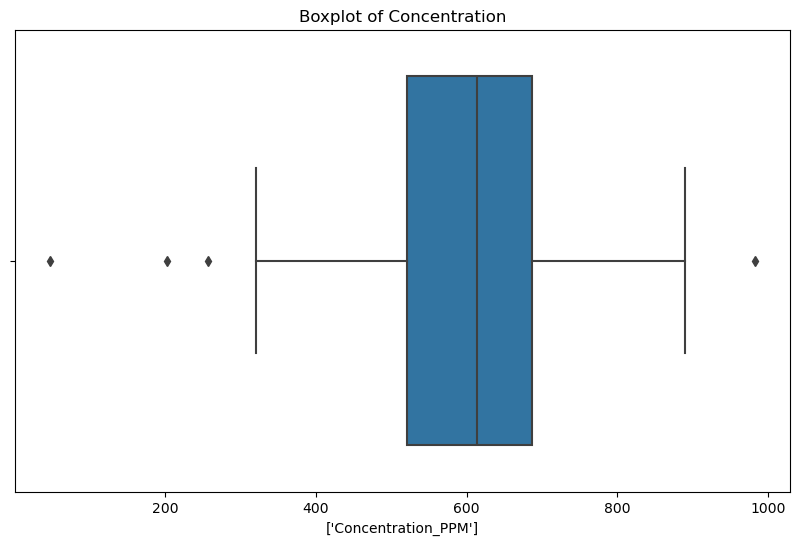

In [31]:
#identification of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Concentration_PPM'])
plt.title('Boxplot of Concentration')
plt.xlabel(['Concentration_PPM'])
plt.show()

In [32]:
#removing outliers
Q1 = df['Concentration_PPM'].quantile(0.25)
Q3 = df['Concentration_PPM'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['Concentration_PPM'] >= lower_bound) & (df['Concentration_PPM'] <= upper_bound)]

print("Original DataFrame:")
print(df)
print("\nDataFrame without outliers:")
print(df_no_outliers)

Original DataFrame:
          Date      Time  Inlet_Temp_C  Outlet_Temp_C  Specific_heat_capacity  \
0   20-05-2024  00:00:00         77.48          50.13                    4.18   
1   20-05-2024  15:00:00         84.15          52.48                    4.18   
2   20-05-2024  18:00:00         79.41          35.29                    4.18   
3   20-05-2024  21:00:00         96.73          54.68                    4.18   
4   21-05-2024  00:00:00         87.92          59.22                    4.18   
..         ...       ...           ...            ...                     ...   
63  08-06-2024  21:00:00         83.34          53.78                    4.18   
64  09-06-2024  00:00:00         70.12          39.56                    4.18   
65  09-06-2024  15:00:00         76.45          43.12                    4.18   
66  09-06-2024  18:00:00         92.34          56.23                    4.18   
67  09-06-2024  21:00:00         88.56          53.67                    4.18   

    Flo

In [33]:
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

In [34]:
df.head()

,Date,Time,Inlet_Temp_C,Outlet_Temp_C,Specific_heat_capacity,Flow_Rate(L/min),Thermal_Efficiency,Pressure_Drop_kPa,Concentration_PPM,Energy_Consumption_kWh
0,NaN,NaN,77.48,50.13,4.18,251.29,85.43,23.65,450.13,29.89
1,NaN,NaN,84.15,52.48,4.18,385.24,82.17,38.74,982.36,18.98
2,NaN,NaN,79.41,35.29,4.18,437.98,71.58,19.85,201.78,19.73
3,NaN,NaN,96.73,54.68,4.18,278.49,74.28,48.23,635.47,21.34
4,NaN,NaN,87.92,59.22,4.18,456.32,93.24,12.41,46.89,22.19


In [16]:
df_no_outliers

,Date,Time,Inlet_Temp_C,Outlet_Temp_C,Specific_heat_capacity,Flow_Rate(L/min),Thermal_Efficiency,Pressure_Drop_kPa,Concentration_PPM,Energy_Consumption_kWh
0,20-05-2024,00:00:00,77.48,50.13,4.18,251.29,85.43,23.65,450.13,29.89
3,20-05-2024,21:00:00,96.73,54.68,4.18,278.49,74.28,48.23,635.47,21.34
5,21-05-2024,15:00:00,61.54,31.56,4.18,385.24,85.65,23.47,710.21,31.76
6,21-05-2024,18:00:00,74.21,33.57,4.18,302.78,72.18,17.56,458.65,12.45
8,22-05-2024,00:00:00,94.45,59.22,4.18,321.47,89.78,45.67,645.23,34.12
...,...,...,...,...,...,...,...,...,...,...
63,08-06-2024,21:00:00,83.34,53.78,4.18,465.67,81.12,27.89,680.56,30.56
64,09-06-2024,00:00:00,70.12,39.56,4.18,230.12,81.67,33.45,529.78,22.78
65,09-06-2024,15:00:00,76.45,43.12,4.18,290.34,79.89,29.56,618.34,27.34
66,09-06-2024,18:00:00,92.34,56.23,4.18,213.45,77.12,30.78,595.67,29.12


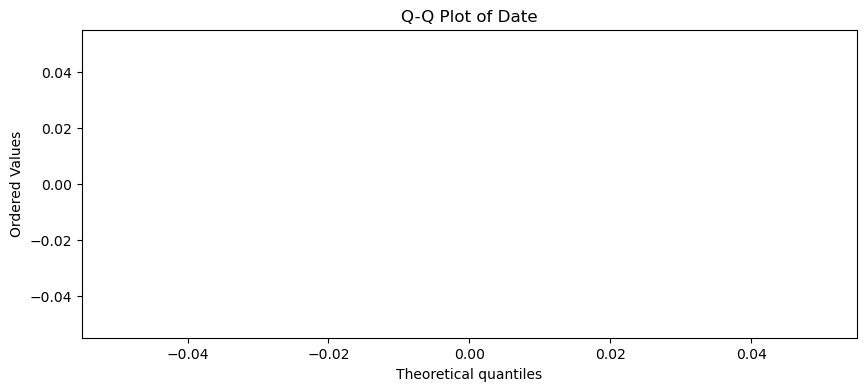

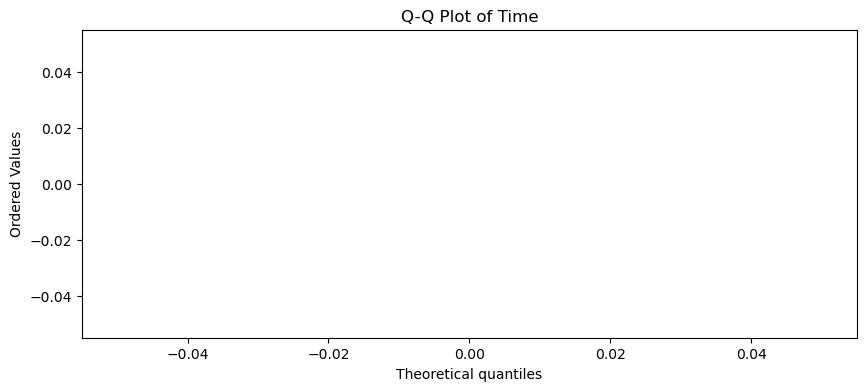

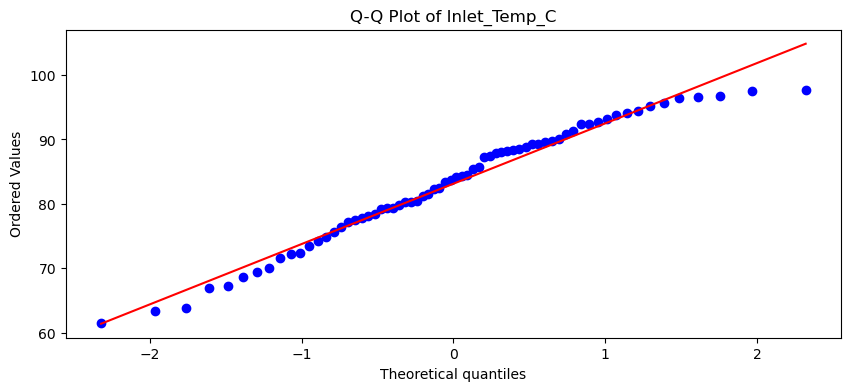

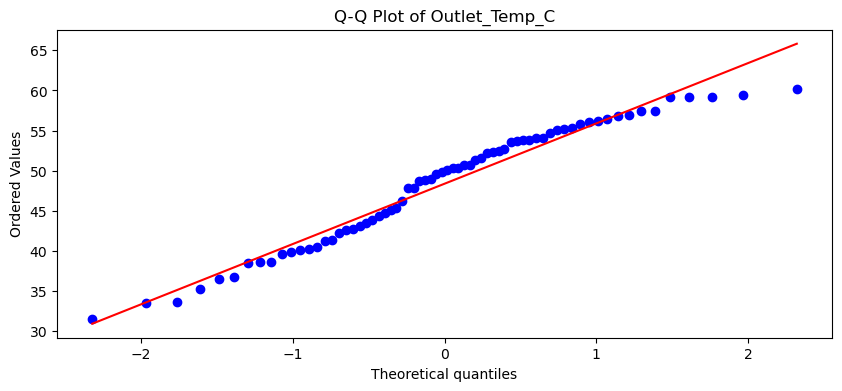

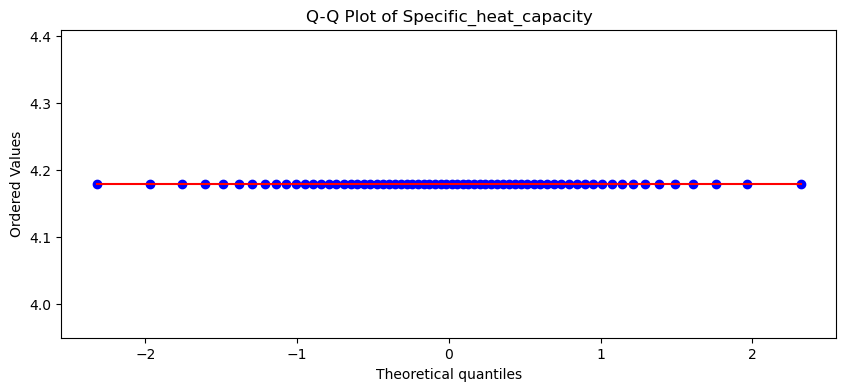

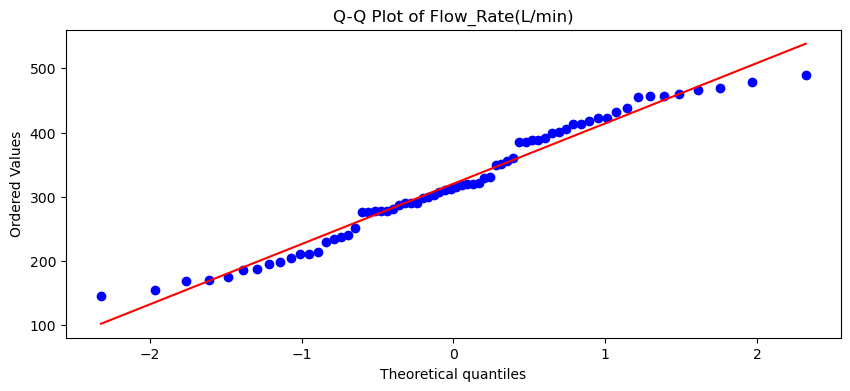

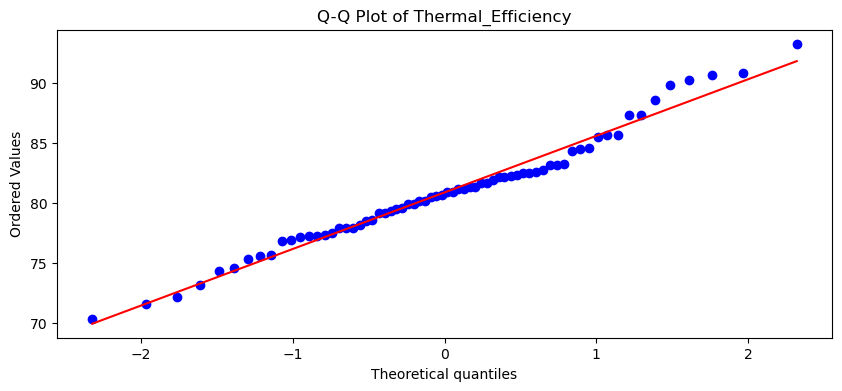

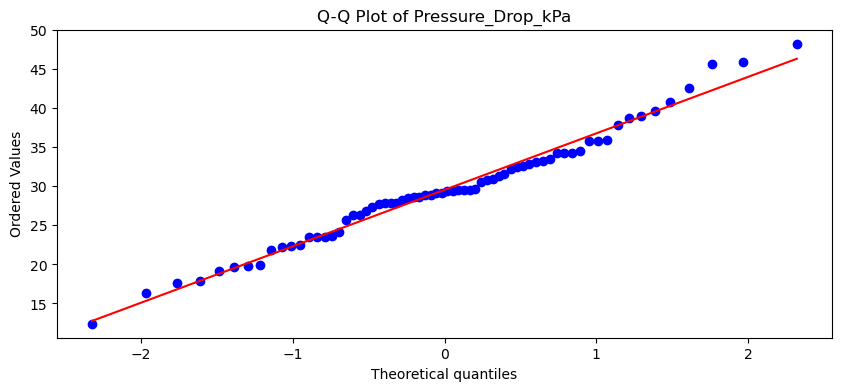

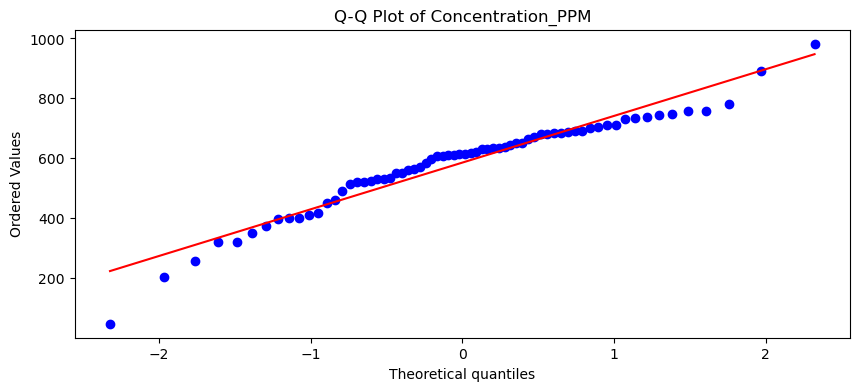

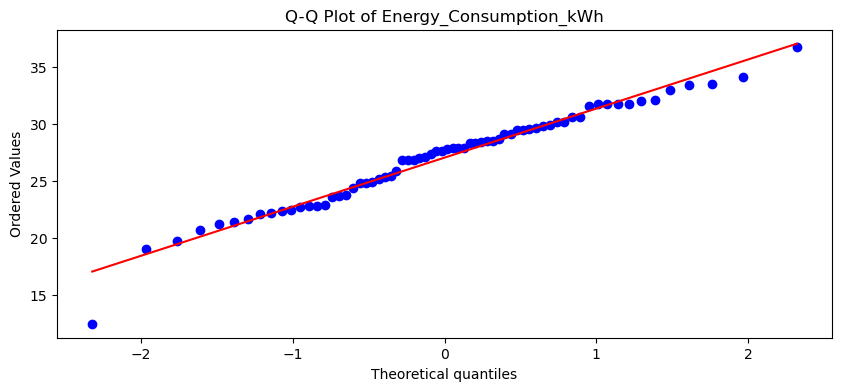

In [35]:
# Q-Q plot(to determine whether the parameters is normally distributed or not)
for column in df_no_outliers:
    plt.figure(figsize=(10, 4))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

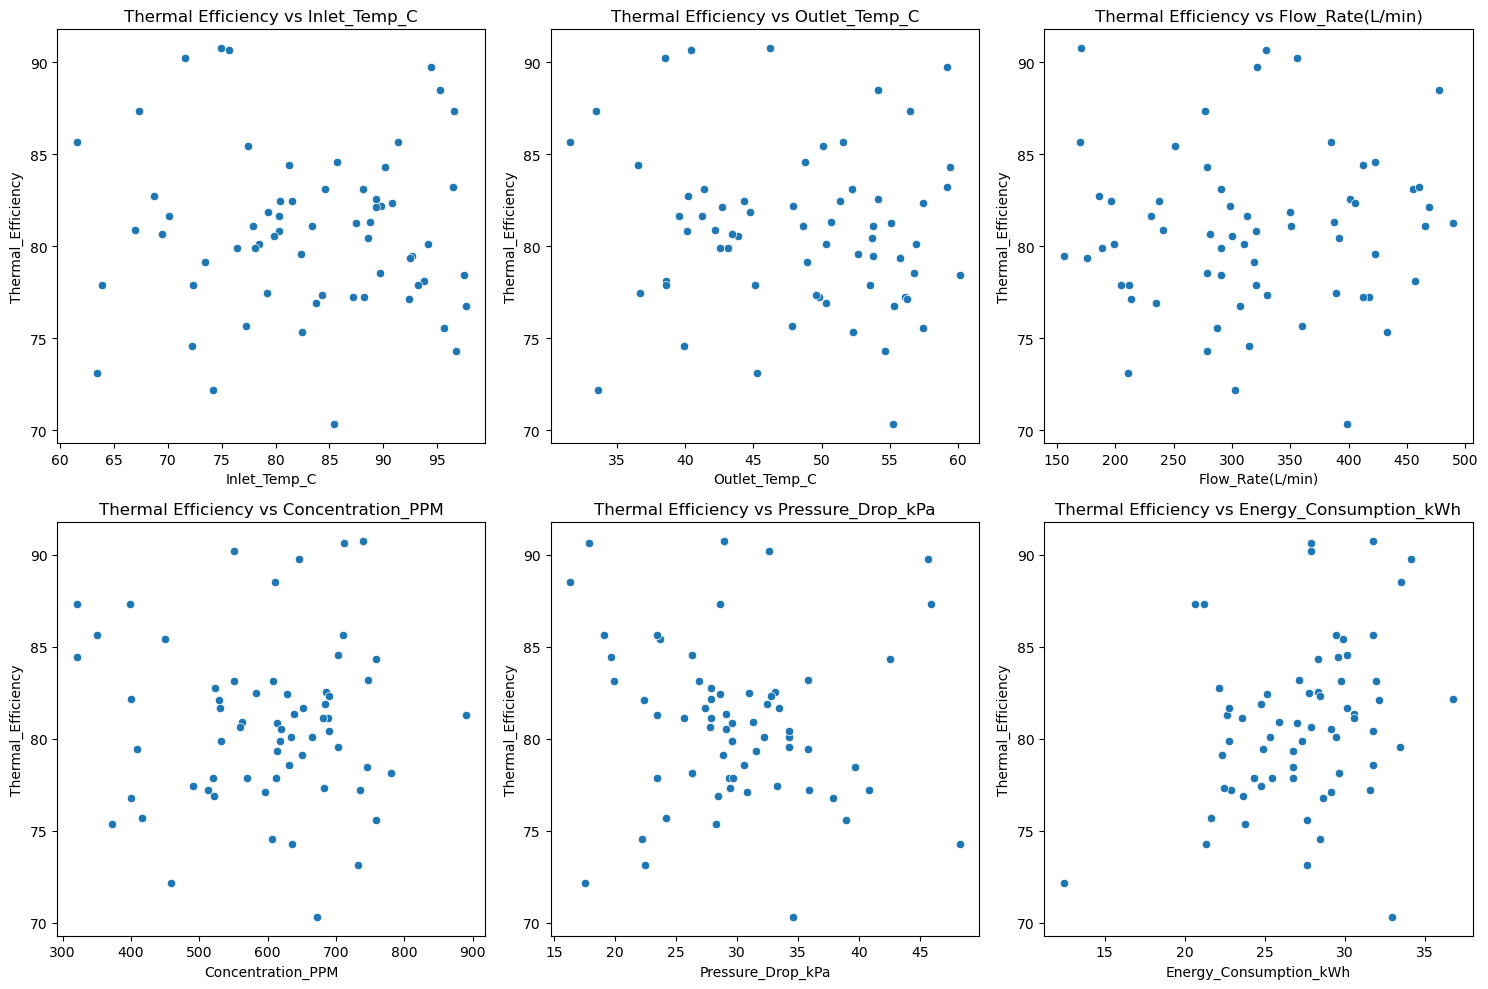

In [18]:
# scatter plot is done to determine whether the parameters shows positive correlation,negative correlation or no relation )
features = ['Inlet_Temp_C', 'Outlet_Temp_C', 'Flow_Rate(L/min)', 'Concentration_PPM', 'Pressure_Drop_kPa','Energy_Consumption_kWh']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df_no_outliers[feature], y=df_no_outliers['Thermal_Efficiency'])
    plt.title(f'Thermal Efficiency vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Thermal_Efficiency')

plt.tight_layout()
plt.show()

In [19]:
#assignning the old name to the new data frame
df = df_no_outliers

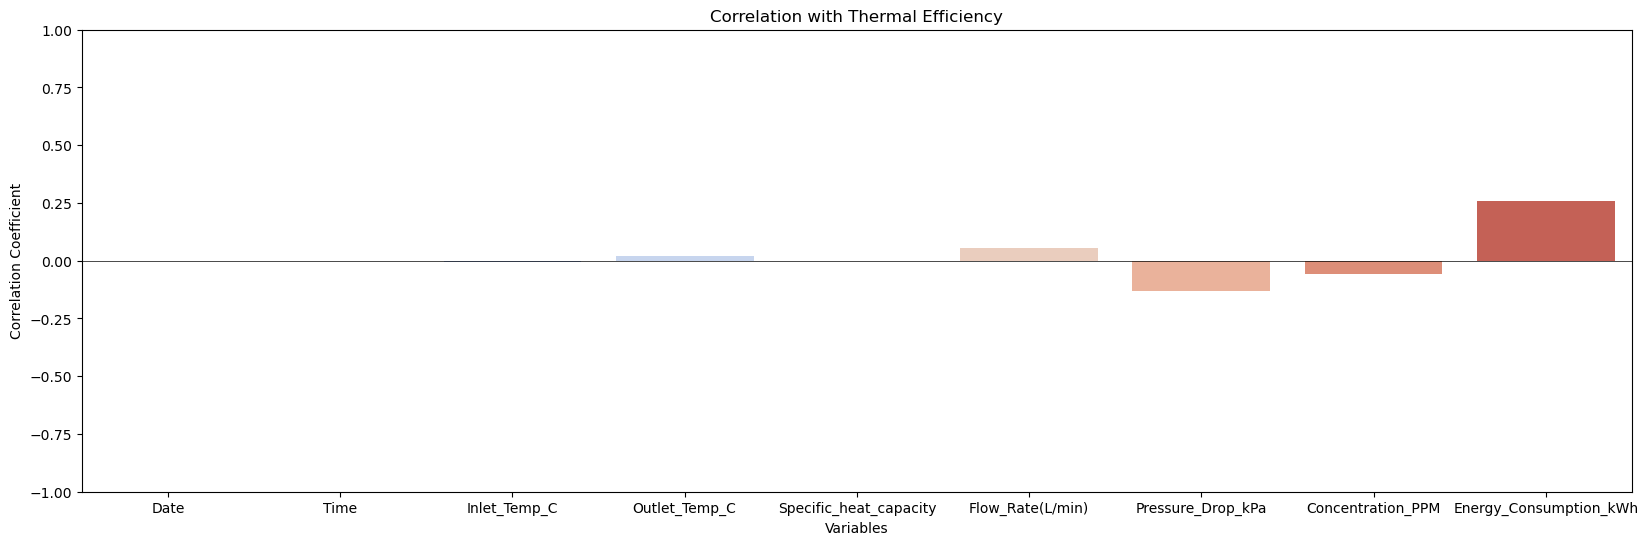

In [36]:
#Positive Bars: Variables with positive bars are positively correlated with Thermal_Efficiency. As these variables increase, Thermal_Efficiency tends to increase.
#Negative Bars: Variables with negative bars are negatively correlated with Thermal_Efficiency. As these variables increase, Thermal_Efficiency tends to decrease.
#Height of Bars: The height (or depth) of each bar indicates the strength of the correlation.

corr_matrix = df.corr()

# Extract correlations with Thermal Efficiency
thermal_efficiency_corr = corr_matrix['Thermal_Efficiency'].drop('Thermal_Efficiency')

# Create a bar plot for visualizing the correlations
plt.figure(figsize=(20, 6))
sns.barplot(x=thermal_efficiency_corr.index, y=thermal_efficiency_corr.values, palette='coolwarm')
plt.title('Correlation with Thermal Efficiency')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

# observation from the above finding
Positive Correlations:

1.Energy Consumption (0.25): **The positive correlation suggests that as energy consumption increases, thermal efficiency tends to increase slightly**.
2.Flow Rate (0.10): **The positive correlation with thermal efficiency is very weak. This suggests that changes in flow rate have a minimal effect on thermal efficiency**.
Negative Correlations:
1.Pressure Drop: **A higher pressure drop might suggest increased resistance in the system, which could decrease thermal efficiency**.
2.Concentration PPM: **Increased concentration might affect the thermal properties of the slurry, potentially reducing efficiency**.

# Statistical Analysis

In [37]:
#Hypothesis testing
#Null Hypothesis (H₀)
#There is no significant difference in thermal efficiency between different levels of pressure drop.
#Alternative Hypothesis (H₁)
#There is a significant difference in thermal efficiency between different levels of pressure drop.

threshold = df['Pressure_Drop_kPa'].median()
group1 = df[df['Pressure_Drop_kPa'] <= threshold]['Thermal_Efficiency']
group2 = df[df['Pressure_Drop_kPa'] > threshold]['Thermal_Efficiency']

# Perform T-Test
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 1.2727
P-value: 0.2076


# observation from the above finding
p value >0.05
we failed to reject null hypothesis


In [135]:
#Null Hypothesis (H₀)
#There is no significant difference in thermal efficiency related to energy consumption
#Alternative Hypothesis (H₁)
#There is a significant difference in thermal efficiency related to energy consumption.

threshold = df['Energy_Consumption_kWh'].median()
group1 = df[df['Energy_Consumption_kWh'] <= threshold]['Thermal_Efficiency']
group2 = df[df['Energy_Consumption_kWh'] > threshold]['Thermal_Efficiency']

# Perform T-Test
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -2.4956
P-value: 0.0151


# observation from the above finding
p value < 0.05
we reject the null hypothesis